# Isotropic and Anisotropic Kriging {#sec-iso-aniso-kriging}

This chapter illustrates the difference between isotropic and anisotropic Kriging models. The difference is illustrated with the help of the `spotPython` package. Isotropic Kriging models use the same `theta` value for every dimension. Anisotropic Kriging models use different `theta` values for each dimension.

## Example: Isotropic `Spot` Surrogate and the 2-dim Sphere Function {#sec-spot-2d-sphere-iso}


In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from spotPython.utils.init import fun_control_init, surrogate_control_init
PREFIX="003"

Seed set to 123


### The Objective Function: 2-dim Sphere

The `spotPython` package provides several classes of objective functions. We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:

$$
f(x, y) = x^2 + y^2
$$
The size of the `lower` bound vector determines the problem dimension. Here we will use `np.array([-1, -1])`, i.e., a two-dimensional function.


In [2]:
fun = analytical().fun_sphere
fun_control = fun_control_init(PREFIX=PREFIX,
                               lower = np.array([-1, -1]),
                               upper = np.array([1, 1]))

Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_p040025_2024-01-14_14-56-52 for SummaryWriter()


Although the default `spot` surrogate model is an isotropic Kriging model, we will explicitly set the `n_theta` parameter to a value of `1`, so that the same theta value is used for both dimensions.
This is done to illustrate the difference between isotropic and anisotropic Kriging models.


In [3]:
surrogate_control=surrogate_control_init(n_theta=1)

In [4]:
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()

spotPython tuning: 1.801603872454505e-05 [#######---] 73.33% 


spotPython tuning: 1.801603872454505e-05 [########--] 80.00% 


spotPython tuning: 1.801603872454505e-05 [#########-] 86.67% 


spotPython tuning: 1.801603872454505e-05 [#########-] 93.33% 


spotPython tuning: 1.801603872454505e-05 [##########] 100.00% Done...



### Results


In [5]:
spot_2.print_results()

min y: 1.801603872454505e-05
x0: 0.0019077911677074135
x1: 0.003791618596979743


[['x0', 0.0019077911677074135], ['x1', 0.003791618596979743]]

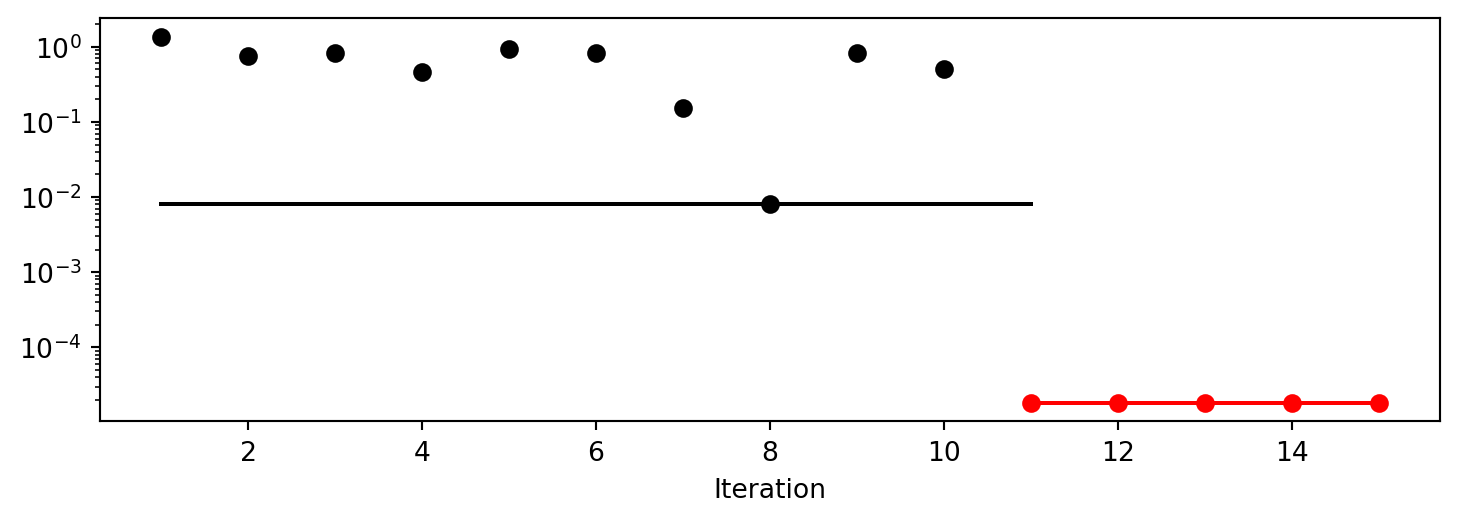

In [6]:
spot_2.plot_progress(log_y=True)

## Example With Anisotropic Kriging

As described in @sec-spot-2d-sphere-iso, the default parameter setting of `spotPython`'s Kriging surrogate uses the same `theta` value for every dimension. This is referred to as "using an isotropic kernel".  If different `theta` values are used for each dimension, then an anisotropic kernel is used. To enable anisotropic models in `spotPython`, the number of `theta` values should be larger than one. We can use `surrogate_control=surrogate_control_init(n_theta=2)` to enable this behavior (`2` is the problem dimension).


In [7]:
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()

spotPython tuning: 1.783225688095949e-05 [#######---] 73.33% 


spotPython tuning: 1.783225688095949e-05 [########--] 80.00% 


spotPython tuning: 1.783225688095949e-05 [#########-] 86.67% 


spotPython tuning: 3.0185289245739795e-06 [#########-] 93.33% 


spotPython tuning: 3.0185289245739795e-06 [##########] 100.00% Done...



The search progress of the optimization with the anisotropic model can be visualized:


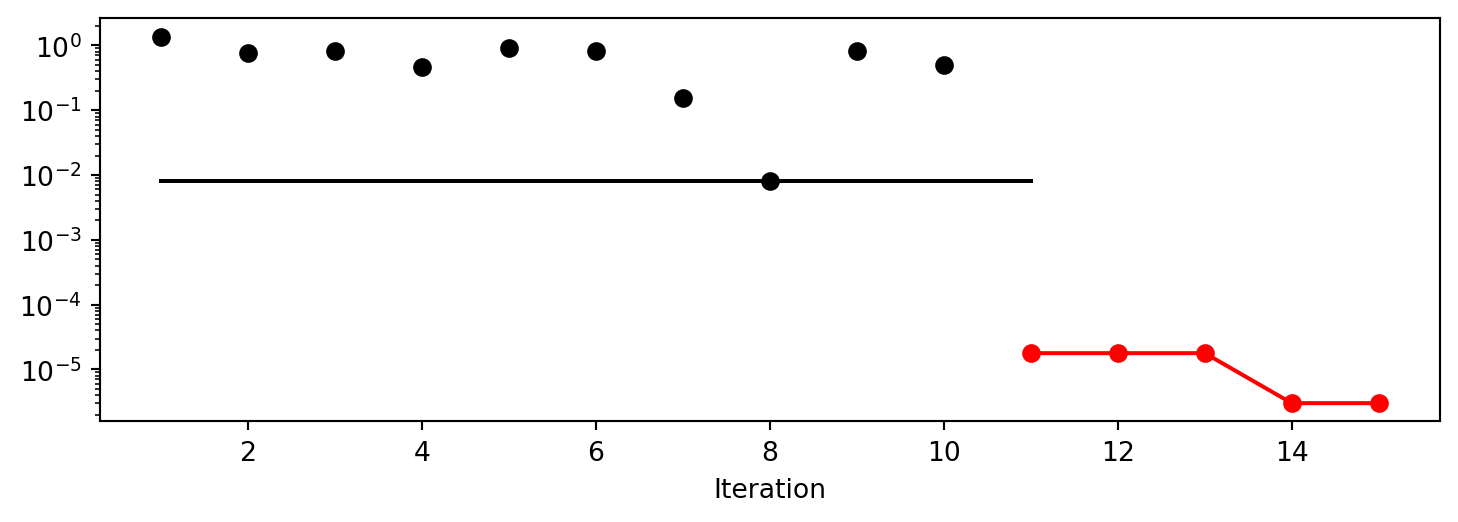

In [8]:
spot_2_anisotropic.plot_progress(log_y=True)

In [9]:
spot_2_anisotropic.print_results()

min y: 3.0185289245739795e-06
x0: -0.0001531610695200253
x1: -0.0017306272306182697


[['x0', -0.0001531610695200253], ['x1', -0.0017306272306182697]]

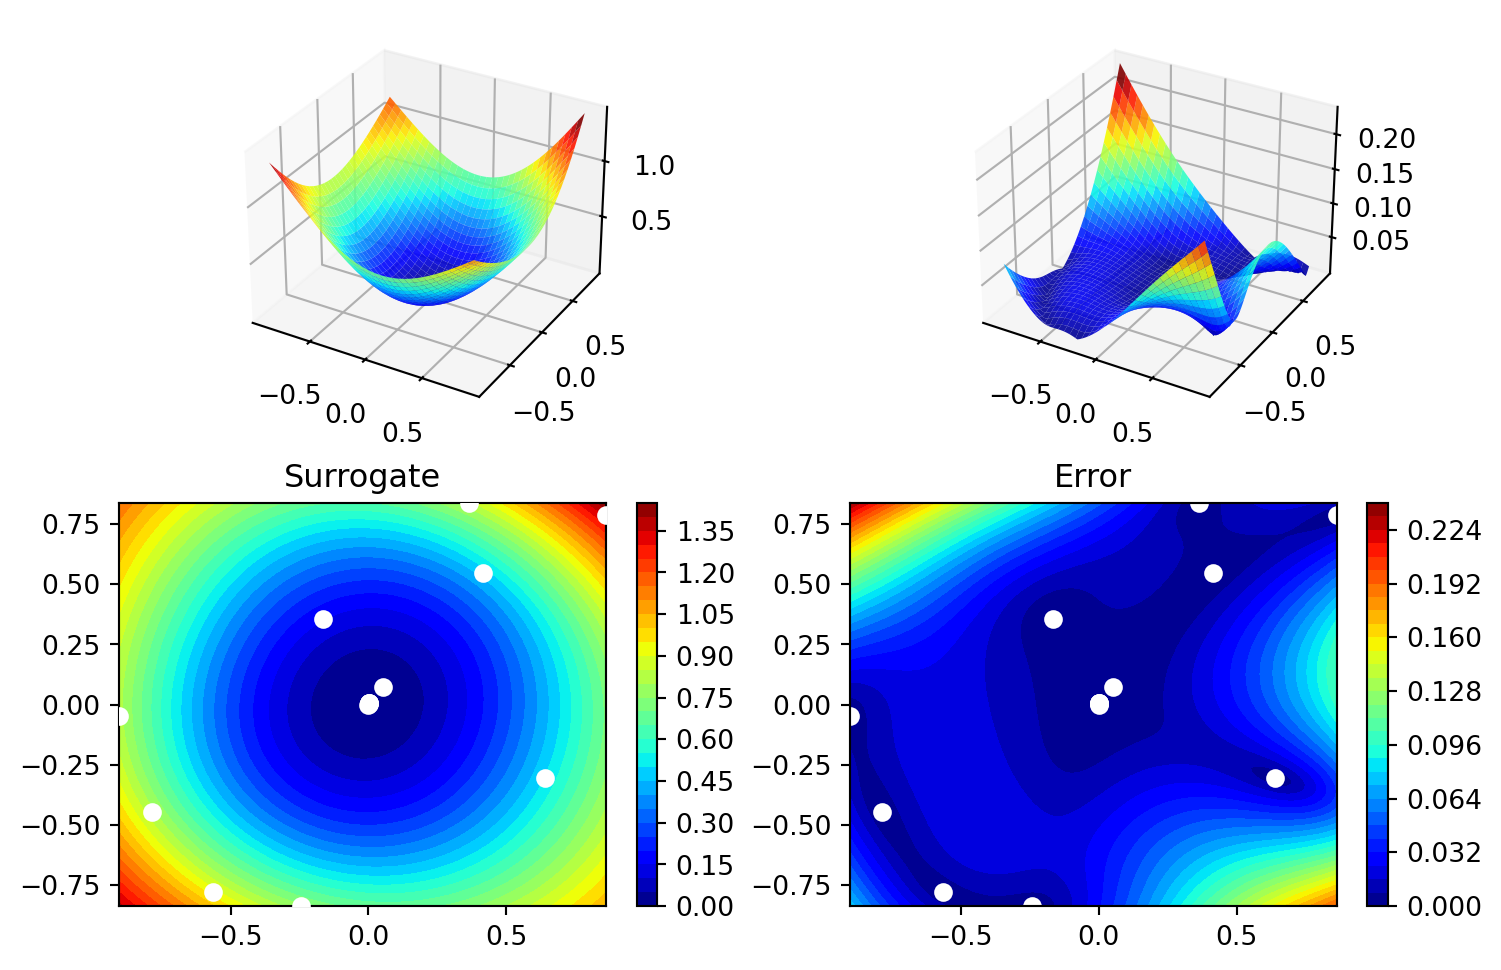

In [10]:
spot_2_anisotropic.surrogate.plot()

### Taking a Look at the `theta` Values

#### `theta` Values from the `spot` Model

We can check, whether one or several `theta` values were used. The `theta` values from the surrogate can be printed as follows:


In [11]:
spot_2_anisotropic.surrogate.theta

array([-0.29237522, -0.13253124])

* Since the surrogate from the isotropic setting was stored as `spot_2`, we can also take a look at the `theta` value from this model:


In [12]:
spot_2.surrogate.theta

array([-0.04189656])

#### TensorBoard

Now we can start TensorBoard in the background with the following command:





```{raw}
tensorboard --logdir="./runs"
```





We can access the TensorBoard web server with the following URL:





```{raw}
http://localhost:6006/
```





The TensorBoard plot illustrates how `spotPython` can be used as a microscope for the internal mechanisms of the surrogate-based optimization process. Here, one important parameter, the learning rate $\theta$ of the Kriging surrogate is plotted against the number of optimization steps.

![TensorBoard visualization of the spotPython surrogate model.](figures_static/03_tensorboard_03.png){width="100%"}



## Exercises


### 1. The Branin Function `fun_branin`

* Describe the function.
  * The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 10$ and $0 \leq x_2 \leq 15$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion: instead of the number of evaluations (which is specified via `fun_evals`), the time should be used as the termination criterion. This can be done as follows (`max_time=1` specifies a run time of one minute):


In [13]:
#| eval: false
from math import inf
fun_control = fun_control_init(
              fun_evals=inf,
              max_time=1)

### 2. The Two-dimensional Sin-Cos Function `fun_sin_cos`

* Describe the function.
  *  The input dimension is `2`. The search range is  $-2\pi \leq x_1 \leq 2\pi$ and $-2\pi \leq x_2 \leq 2\pi$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

### 3. The Two-dimensional Runge Function `fun_runge`

* Describe the function.
  *  The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 5$ and $-5 \leq x_2 \leq 5$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

### 4. The Ten-dimensional Wing-Weight Function `fun_wingwt`

* Describe the function.
  *  The input dimension is `10`. The search ranges are between 0 and 1 (values are mapped internally to their natural bounds).
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.


### 5. The Two-dimensional Rosenbrock Function `fun_rosen` {#sec-09-exercise-rosen}

* Describe the function.
  *  The input dimension is `2`. The search ranges are between -5 and 10.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.


## Selected Solutions

### Solution to Exercise @sec-09-exercise-rosen: The Two-dimensional Rosenbrock Function `fun_rosen`

#### The Two Dimensional `fun_rosen`: The Isotropic Case


In [14]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, surrogate_control_init
from spotPython.spot import spot

The `spotPython` package provides several classes of objective functions.
We will use the `fun_rosen` in the `analytical` class [[SOURCE]](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotPython/fun/objectivefunctions.py).


In [15]:
fun_rosen = analytical().fun_rosen

Here we will use problem dimension $k=2$, which can be specified by the `lower` bound arrays.
The size of the `lower` bound array determines the problem dimension.

The prefix is set to `"ROSEN"` to distinguish the results from the one-dimensional case.
Again, TensorBoard can be used to monitor the progress of the optimization.


In [16]:
fun_control = fun_control_init(
              PREFIX="ROSEN",
              lower = np.array([-5, -5]),
              upper = np.array([10, 10]),
              show_progress=True)
surrogate_control = surrogate_control_init(n_theta=1)
spot_rosen = spot.Spot(fun=fun_rosen,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
spot_rosen.run()

Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/ROSEN_p040025_2024-01-14_14-56-56 for SummaryWriter()
spotPython tuning: 52.87631878551649 [#######---] 73.33% 


spotPython tuning: 52.361867783356715 [########--] 80.00% 


spotPython tuning: 52.361867783356715 [#########-] 86.67% 


spotPython tuning: 43.44273941029301 [#########-] 93.33% 


spotPython tuning: 12.275684138292505 [##########] 100.00% Done...



::: {.callout-note}
Now we can start TensorBoard in the background with the following command:



```{raw}
tensorboard --logdir="./runs"
```


and can access the TensorBoard web server with the following URL:



```{raw}
http://localhost:6006/
```


::: 

##### Results


In [17]:
_ = spot_rosen.print_results()

min y: 12.275684138292505
x0: -2.3708459318321333
x1: 5.923082873674319


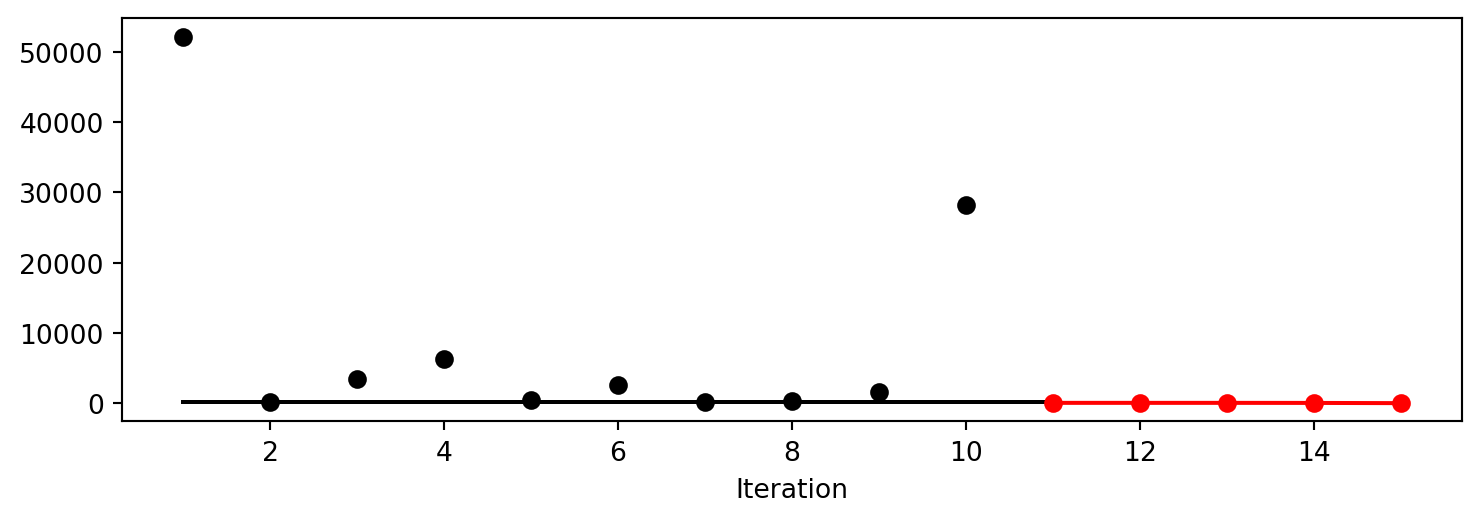

In [18]:
spot_rosen.plot_progress()

##### A Contour Plot

We can select two dimensions, say $i=0$ and $j=1$, and generate a contour plot as follows.


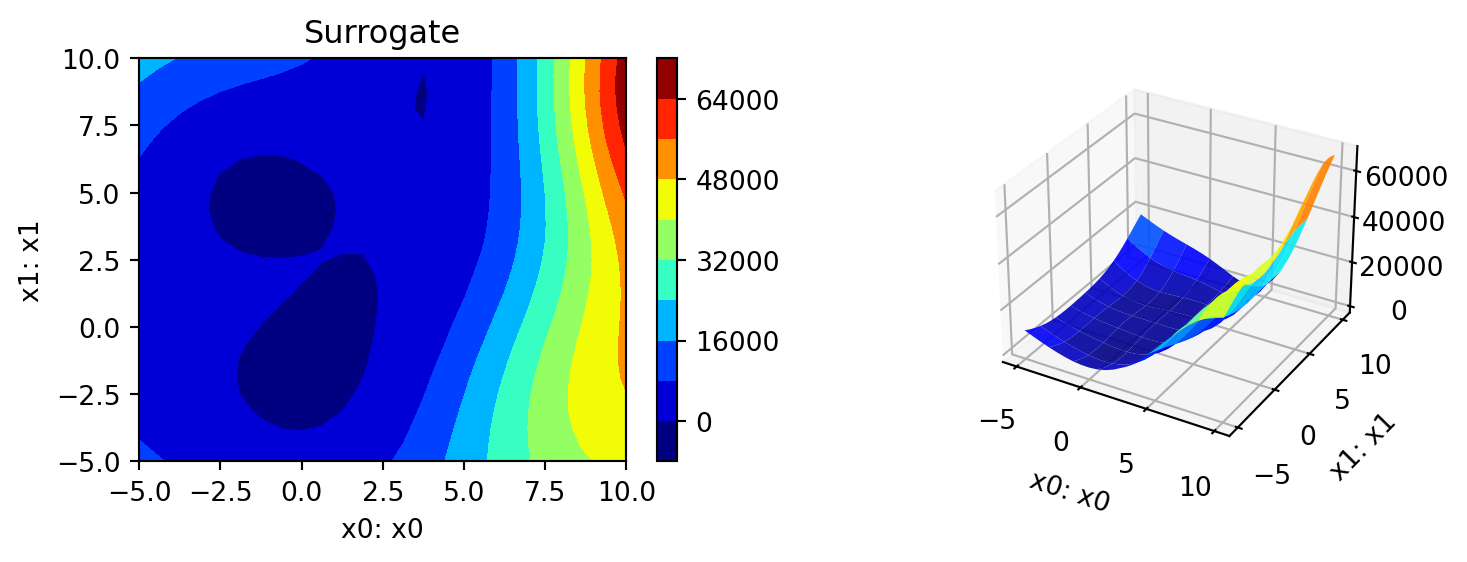

In [19]:
min_z = None
max_z = None
spot_rosen.plot_contour(i=0, j=1, min_z=min_z, max_z=max_z)

* The variable importance cannot be calculated, because only one `theta` value was used.


##### TensorBoard

TBD



#### The Two Dimensional `fun_rosen`: The Anisotropic Case


In [20]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, surrogate_control_init
from spotPython.spot import spot

The `spotPython` package provides several classes of objective functions.
We will use the `fun_rosen` in the `analytical` class [[SOURCE]](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotPython/fun/objectivefunctions.py).


In [21]:
fun_rosen = analytical().fun_rosen

Here we will use problem dimension $k=2$, which can be specified by the `lower` bound arrays.
The size of the `lower` bound array determines the problem dimension. 

We can also add interpreable labels to the dimensions, which will be used in the plots. 


In [22]:
fun_control = fun_control_init(
              PREFIX="ROSEN",
              lower = np.array([-5, -5]),
              upper = np.array([10, 10]),
              show_progress=True)
surrogate_control = surrogate_control_init(n_theta=2)
spot_rosen = spot.Spot(fun=fun_rosen,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
spot_rosen.run()

Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/ROSEN_p040025_2024-01-14_14-56-57 for SummaryWriter()
spotPython tuning: 90.7801015955818 [#######---] 73.33% 


spotPython tuning: 1.0172832635943474 [########--] 80.00% 


spotPython tuning: 1.0172832635943474 [#########-] 86.67% 


spotPython tuning: 1.0172832635943474 [#########-] 93.33% 


spotPython tuning: 1.0172832635943474 [##########] 100.00% Done...



::: {.callout-note}
Now we can start TensorBoard in the background with the following command:



```{raw}
tensorboard --logdir="./runs"
```


and can access the TensorBoard web server with the following URL:



```{raw}
http://localhost:6006/
```


::: 

##### Results


In [23]:
_ = spot_rosen.print_results()

min y: 1.0172832635943474
x0: 0.0028122200003174065
x1: -0.04784582169505708


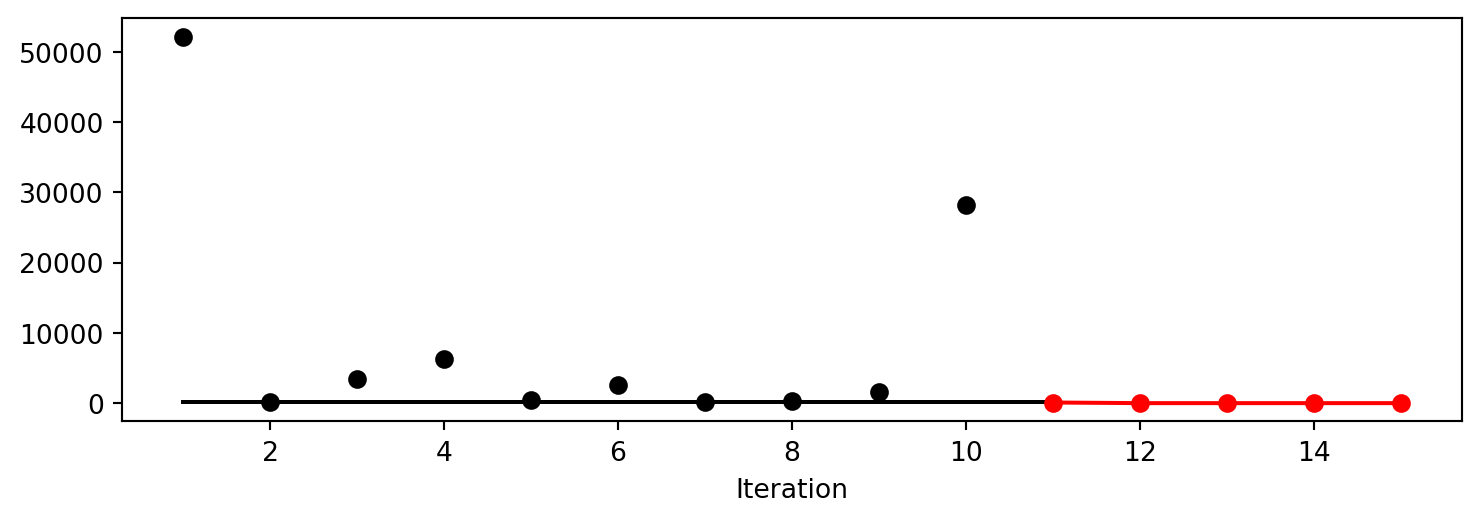

In [24]:
spot_rosen.plot_progress()

##### A Contour Plot

We can select two dimensions, say $i=0$ and $j=1$, and generate a contour plot as follows.


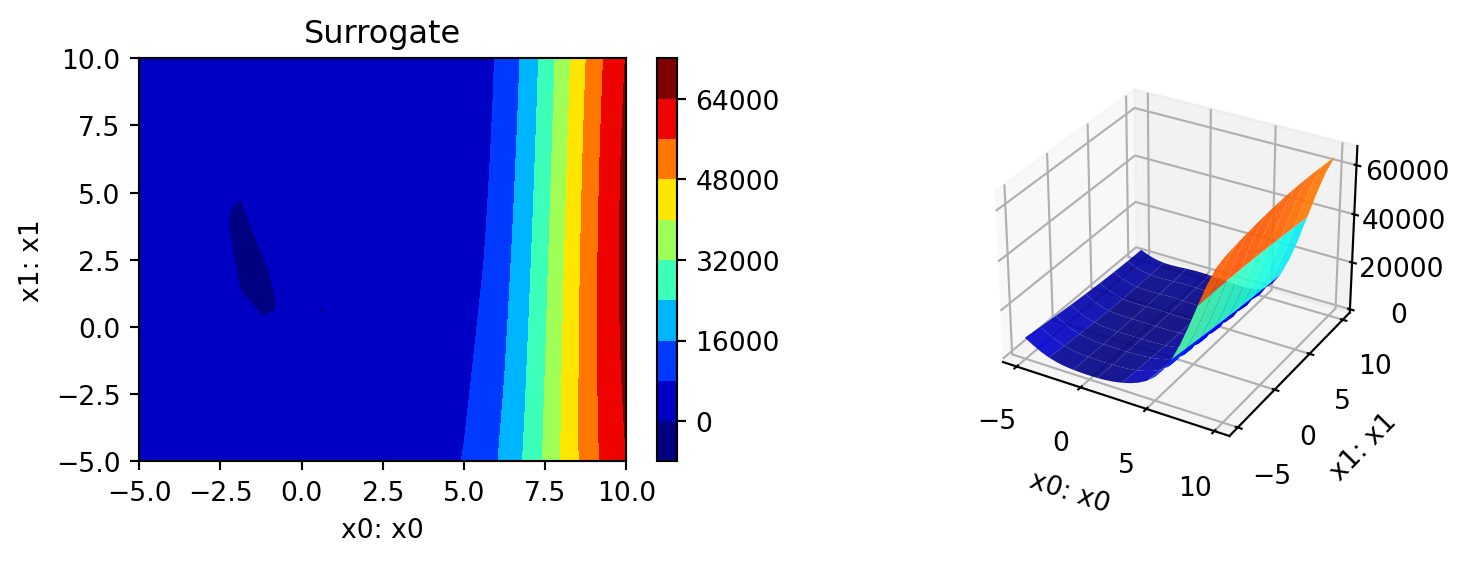

In [25]:
min_z = None
max_z = None
spot_rosen.plot_contour(i=0, j=1, min_z=min_z, max_z=max_z)

* The variable importance can be calculated as follows:


In [26]:
_ = spot_rosen.print_importance()

x0:  100.0
x1:  2.2276773313197755


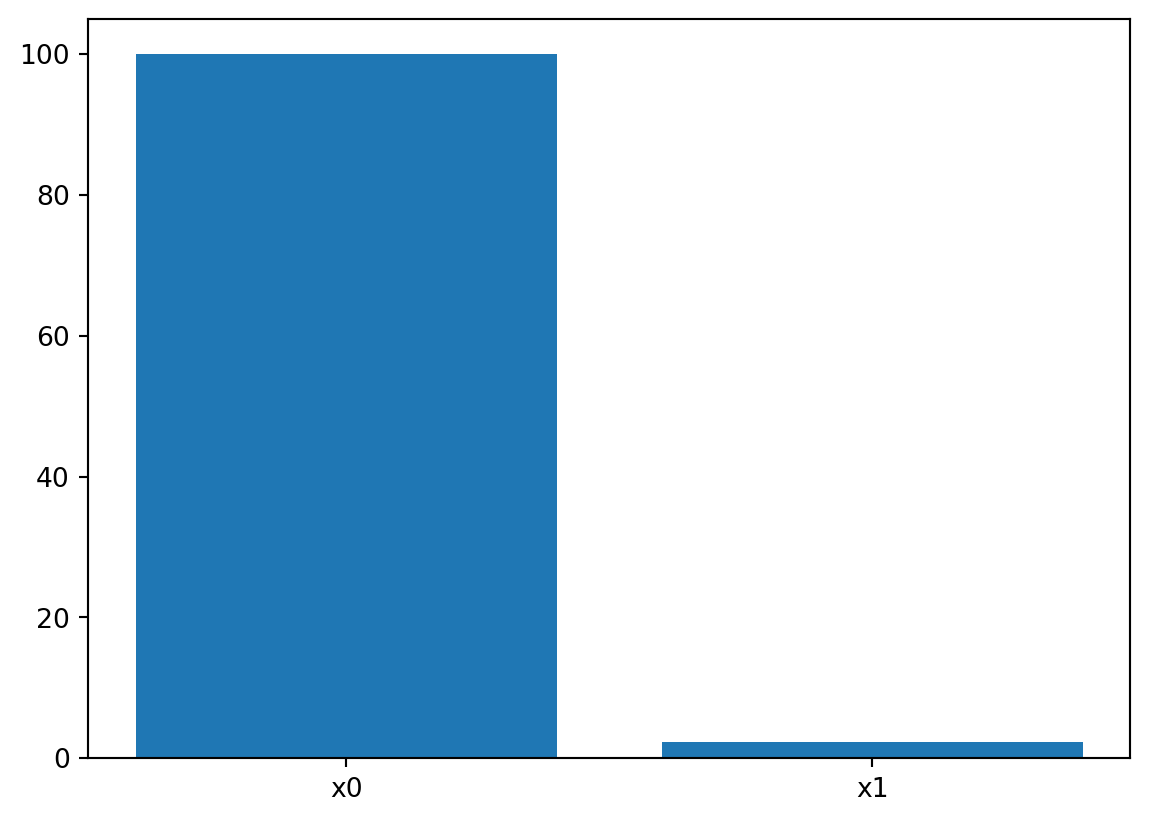

In [27]:
spot_rosen.plot_importance()

##### TensorBoard

TBD



## Jupyter Notebook

:::{.callout-note}

* The Jupyter-Notebook of this lecture is available on GitHub in the [Hyperparameter-Tuning-Cookbook Repository](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/009_num_spot_anisotropic.ipynb)

:::
